# Learning Pytorch

* [Youtube video side](https://www.youtube.com/watch?v=V_xro1bcAuA&t=40s)
* [Kode](https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqa1hUcDlKNFBOaVJPMHh5WTBGSUdzVm5zaHlfUXxBQ3Jtc0ttVWh5OUhGSGtON1ZyRkZJcXM3TGtrSmV6eUIyckRlQU1fX2xLVDN1VDJkMkgtVHg4QmJyUE14NjdBVzh1MGVLR01MSWV6WGVmSzhTc3JjWm9aVkV3T01TN3hua1NaWDVlUWYxUlowUGE0RGRMVjZ2SQ&q=https%3A%2F%2Fgithub.com%2Fmrdbourke%2Fpytorch-deep-learning&v=V_xro1bcAuA)
* [learnpytorch](https://www.learnpytorch.io)

In [1]:
import torch
import pandas as pd
import numpy as np

# Tesnor

Måden at repræsenter data på. 

* Skalar tensor, 
* Vector
  * Husk at forskellen mellem dimension og shape 
* Random tensor er vigtig da Neural netværk starter med tilfældige tal men som så finder et mønster. 

In [2]:
scalar = torch.tensor(7)
vector = torch.tensor([7, 7])

random_tensro = torch.rand(3, 4)

print('Dimension af skalar \n', scalar.ndim)
print('items af skalar \n', scalar.item())

print('vector af skalar \n', vector)
print('vector af dimension \n', vector.ndim)

print('random \n', random_tensro)

Dimension af skalar 
 0
items af skalar 
 7
vector af skalar 
 tensor([7, 7])
vector af dimension 
 1
random 
 tensor([[0.3518, 0.4526, 0.7451, 0.2036],
        [0.1532, 0.0061, 0.5654, 0.5160],
        [0.3399, 0.4191, 0.8197, 0.8368]])


In [3]:
# zero
zeroas = torch.zeros(size = (3, 4))
zeroas

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

vigtig at tensor har rette type, shape og device (om cuda, cpu eller gpu)

# Pytorch workflow


In [4]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Data (preparing and loading)

Lav data *know* with used of linear regression

In [5]:
from pyparsing import srange


weights = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1) # unsqueeze tilføjer en dimension.
y = weights * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [6]:
len(X), len(y)

(50, 50)

In [7]:
# Splitting into 
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test)

(40, 10)

In [8]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    """_summary_

    Args:
        train_data (_type_, optional): _description_. Defaults to X_train.
        train_labels (_type_, optional): _description_. Defaults to y_train.
        test_data (_type_, optional): _description_. Defaults to X_test.
        test_labels (_type_, optional): _description_. Defaults to y_test.
        predictions (_type_, optional): _description_. Defaults to None.
    """
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c = 'b', s = 4, label = 'Training Data')
    
    plt.scatter(test_data, test_labels, c = 'g', s = 4, label = 'Test Data')
    
    if predictions != None:
        plt.scatter(test_data, predictions, c = 'r', s = 4, label = 'Predictions')
        
    plt.legend(prop = {'size': 14}); 

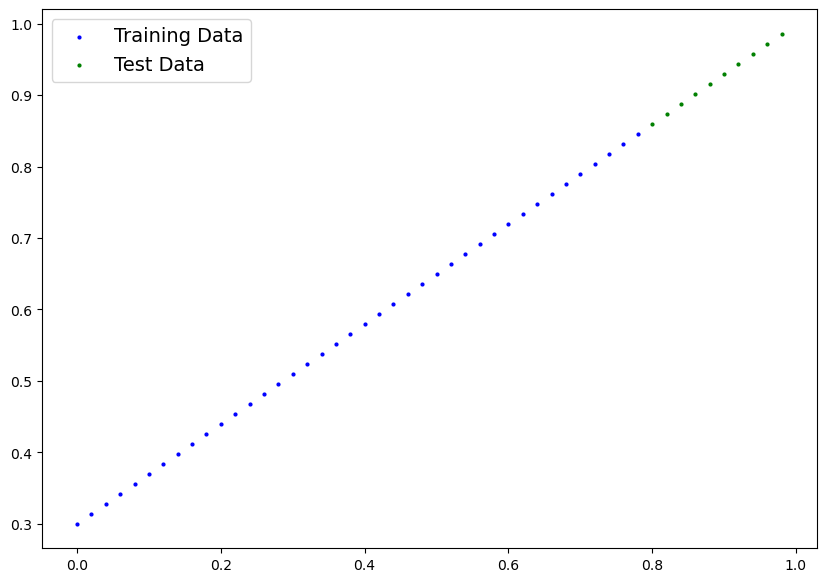

In [9]:
plot_predictions()

In [10]:
# Build model
## Laver inheriant form nn.Module. Der indeholder en masse
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, 
                                                requires_grad=True,
                                                dtype = torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype = torch.float))
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

What is super()?

* It 



# Main classes

* torch.nn -> neruale netværk
* torch.Parameter -> ting vi vil lære
* torch.nn.Moduel -> Base klassen for alle neurale netværk. 
* torch.optim -> optimerings algoritmer.
* def forward() -> Alle nn.Module kræver vi skal overskride forward. Den definer hvad der ske ri forward beregningen.

In [11]:
torch.randn(1)

tensor([0.5042])

In [12]:
# Se output for modellen vi har lavet

## Random seed

torch.manual_seed(42)

model_0 = LinearRegressionModel()

# Tjek parameterne
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [13]:
# List named parameter

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [14]:
weights, bias 

(0.7, 0.3)

# Making prediction with `torch.inference_mode()`



In [15]:
# Inference mode is a content manager and is important
# We loose the tracking of other things so we can keep things faster. 

y_preds2 = model_0(X_test)
y_preds2

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [16]:
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

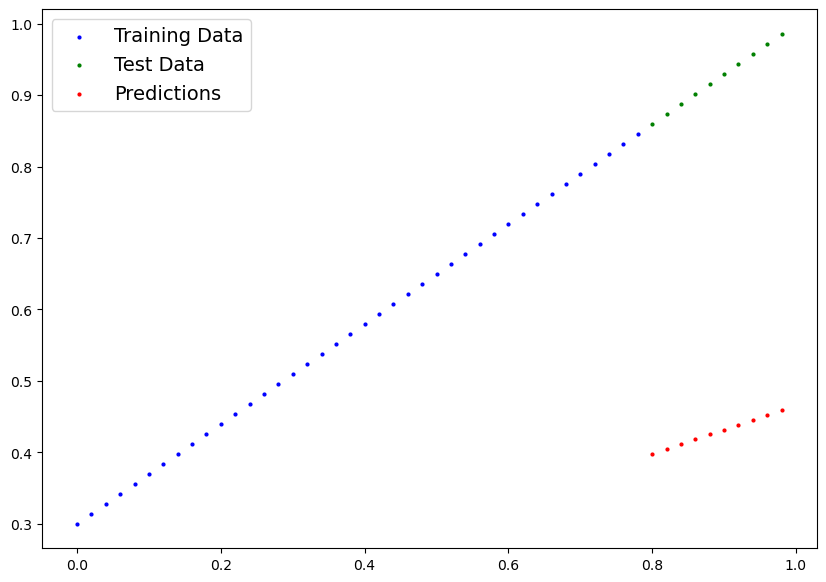

In [17]:
plot_predictions(predictions=y_preds)

## Train model

Mening er vi kommer til at kende de ukendte variabler. 

VI kan træner loss og optimizer



In [18]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [19]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [20]:
# Setup loss
loss_fn = nn.L1Loss()

# Setup optimizer
optimizer = (
    torch
    .optim
    .SGD(params = model_0.parameters(),
                            lr = 0.01) # Ændre på vægten men hvor deciamlen er den so ændres.
)

## Traning loop for optimize parameter

0. loop thoug data
1. forward pass also calle dforward propagation
2. calculate loss (compar forward pass prediction to ground truth)
3. optimize zero grad
4. loss backward - move backward to calculat ethe gradients 
5. optimizer step - adjust paramrter

* E

In [21]:
torch.manual_seed(123)



# loop though the data (because we set epochs ourselves it is a hyperparameter)
epochs = 200

epochs_count = []
loss_values = []
test_loss_value = []

# 0. loop though data

for epoch in range(epochs):
    # Set the model to traning mode. Make sure that we update gradients. 
    model_0.train()
    
    # 1. forwars
    y_pred = model_0(X_train)
    
    # 2. loss
    loss = loss_fn(y_pred, y_train)
    print(f'Loss:', {loss})
    
    # 3. Optimize 
    optimizer.zero_grad()
    
    # 4. Perform backpropagation
    loss.backward()
    
    # 5. OPtimizer performance
    optimizer.step()
    
    ### Testing
    model_0.eval()  # Turn gradients off. Husk at gøre det når vi tester modellen. 
    with torch.inference_mode(): # Turns of gradients tracking and other things
        # 1. forward pass
        test_pred = model_0(X_test)
        # 2. Loss
        test_loss = loss_fn(test_pred, y_test)
        # 3. Optimize
        
    # Print out
    if epoch % 40 == 0:
        epochs_count.append(epoch)
        loss_values.append(loss)
        test_loss_value.append(test_loss)
        print(f'Epoch:  {epoch} | Test {loss} | Test loss {test_loss}')
        print(model_0.state_dict())    

Loss: {tensor(0.3129, grad_fn=<MeanBackward0>)}
Epoch:  0 | Test 0.31288138031959534 | Test loss 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss: {tensor(0.3014, grad_fn=<MeanBackward0>)}
Loss: {tensor(0.2898, grad_fn=<MeanBackward0>)}
Loss: {tensor(0.2783, grad_fn=<MeanBackward0>)}
Loss: {tensor(0.2668, grad_fn=<MeanBackward0>)}
Loss: {tensor(0.2553, grad_fn=<MeanBackward0>)}
Loss: {tensor(0.2438, grad_fn=<MeanBackward0>)}
Loss: {tensor(0.2322, grad_fn=<MeanBackward0>)}
Loss: {tensor(0.2207, grad_fn=<MeanBackward0>)}
Loss: {tensor(0.2092, grad_fn=<MeanBackward0>)}
Loss: {tensor(0.1977, grad_fn=<MeanBackward0>)}
Loss: {tensor(0.1862, grad_fn=<MeanBackward0>)}
Loss: {tensor(0.1746, grad_fn=<MeanBackward0>)}
Loss: {tensor(0.1631, grad_fn=<MeanBackward0>)}
Loss: {tensor(0.1516, grad_fn=<MeanBackward0>)}
Loss: {tensor(0.1401, grad_fn=<MeanBackward0>)}
Loss: {tensor(0.1285, grad_fn=<MeanBackward0>)}
Loss: {tensor(0.1170, grad_fn=<MeanBackwar

In [22]:
weights, bias

(0.7, 0.3)

In [23]:
test_loss_value

[tensor(0.4811),
 tensor(0.1136),
 tensor(0.0723),
 tensor(0.0406),
 tensor(0.0082)]

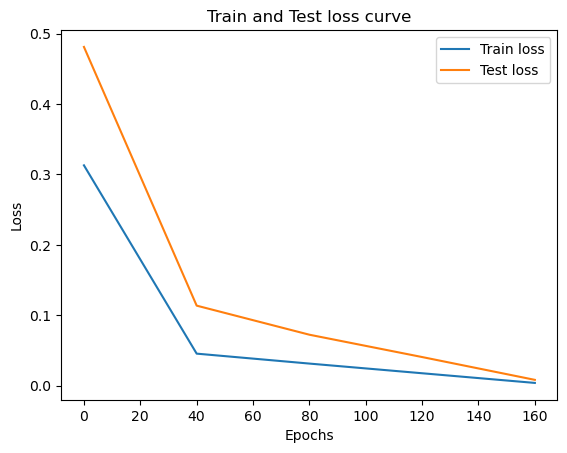

In [24]:
# Plot loss
plt.plot(epochs_count, torch.tensor(loss_values).numpy(), label = 'Train loss')
plt.plot(epochs_count, test_loss_value, label = "Test loss")
plt.title('Train and Test loss curve')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend();

In [25]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

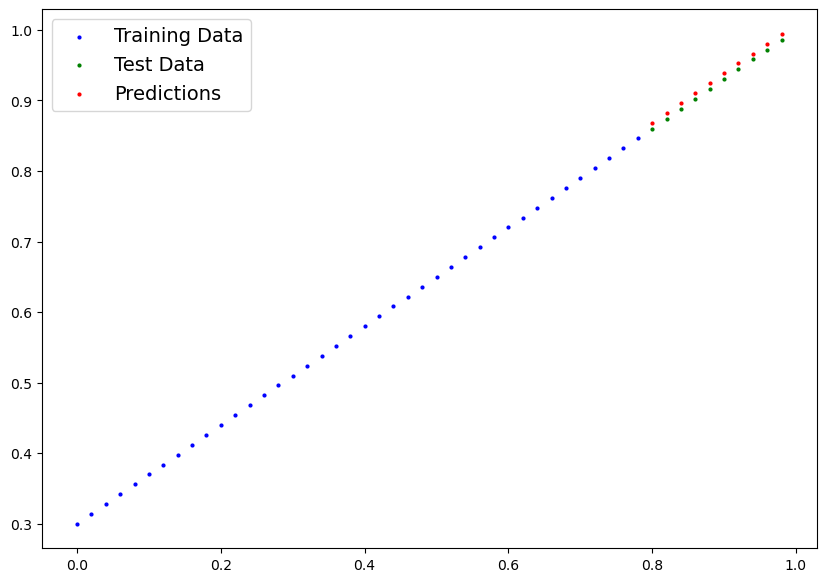

In [26]:
plot_predictions(predictions=y_preds_new)

## Save model

3 metoder til saving and loading models

1. `torch.save()` - save in pickle format. 
2. `torch.load()` 
3. `torch.nn.Module.load_stat_dict()` - load state dict

In [27]:
# Saves models output in a python dict. 
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [28]:
from pathlib import Path

# 1. Lav folder til model
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents = True, exist_ok=True)

# 2. Lav model save path
MODEL_NAME = '01_pytorch_wf_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH
 
# 3. Gem model state dict
torch.save(obj = model_0.state_dict(), 
           f = MODEL_SAVE_PATH)

In [29]:
# Load 
loaded_model_0 = LinearRegressionModel()

# Load state dict
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

print(f'Load model with weight \n: {loaded_model_0.state_dict()}')

Load model with weight 
: OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


In [30]:
# Make predictions

loaded_model_0.eval()
with torch.inference_mode():
    y_pred_load_model_0 = loaded_model_0(X_test)

y_pred_load_model_0    

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [31]:
torch.__version__

'1.13.1'

## Data

Create device agnostic code. 
If GPU then we use it. This will do we get a faster computer. 

In [32]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'this is {device}')

this is cpu


# Chapter 2 – Neural Network Classification

* Imagenet: Famouse multi classification dataset. 
* Batch size: 32 is a ideal choize. Measning if a classification look at a image it will look at 32 picture. 

## Archeticure of NNE

Input layer: Is number of features
Hidden Layer: are math stages in the framework. 
Loss: Measure how wrong our model is.

## 1. Make Data ready

In [33]:
import sklearn

In [34]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

len(X), len(y)

(1000, 1000)

In [35]:
print(X[:5]), print(y[:5])

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
[1 1 1 1 0]


(None, None)

In [36]:
# Make DF with Pandas

import pandas as pd
circles = pd.DataFrame({'X1': X[:, 0], 
                        "X2": X[:, 1],
                       "label": y })
circles

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


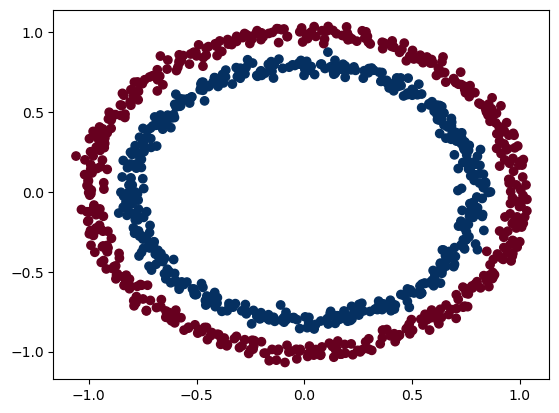

In [37]:
# Visual

import matplotlib.pyplot as plt

plt.scatter(x = X[:, 0],
            y = X[:, 1],
            c = y,
            cmap = plt.cm.RdBu);

We want to differentiae between the two circles. 

* Binary classification. 

In [38]:
X_sample = X[0]
y_sample = y[0]

X_sample, y_sample

(array([0.75424625, 0.23148074]), 1)

In [39]:
# Train and test

import torch

In [40]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [41]:
X.dtype

torch.float32

In [42]:
# Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

len(X_train), len(X_test)

(800, 200)

In [43]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [44]:
from torch import nn
## Building model

class CircleModelsv0(nn.Module):
    
    def __init__(self):
        super().__init__()
        
    # 2. Create 2 nn.Linear layer to handle shape
    ## The `out_features` need to have the same shap af y which is 1.
    ## nn.Linear transfor as acording to https://pytorch.org/docs/stable/generated/torch.nn.Linear.html
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
    # The second layer need to mach the out_features of first layer. 
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # Tak 5 feature and output 1 feature same shape as y
    
    # 3. define forward
    def forward(self, x):
        return self.layer_2(self.layer_1(x) ) # x->layer_1 -> layer_2 -> output
    
    # 4. Instanit instance of model.
    
model_0 = CircleModelsv0().to(device)
model_0

CircleModelsv0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [45]:
# Using nn.Sequential

## Building model

class CircleModelsv0(nn.Module):
    
    def __init__(self):
        super().__init__()
        
    # 2. Create 2 nn.Linear layer to handle shape
    ## The `out_features` need to have the same shap af y which is 1.
    ## nn.Linear transfor as acording to https://pytorch.org/docs/stable/generated/torch.nn.Linear.html
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
    # The second layer need to mach the out_features of first layer. 
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # Tak 5 feature and output 1 feature same shape as y
    
    # 3. define forward
    def forward(self, x):
        return self.layer_2(self.layer_1(x) ) # x->layer_1 -> layer_2 -> output
    
    # 4. Instanit instance of model.
    
model_0 = CircleModelsv0().to(device)
model_0

CircleModelsv0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [46]:
# Dont define forward like before. 
mode_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

mode_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

It is esier but when more complex, then it is good we can build our own layers. 

A Sequential can be used inside class. 

In [47]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.2240, -0.3146],
                      [ 0.5053,  0.5647],
                      [-0.6519,  0.6036],
                      [ 0.3377,  0.3081],
                      [ 0.2911,  0.5878]])),
             ('layer_1.bias',
              tensor([-0.0934, -0.5980, -0.2029, -0.4980,  0.0467])),
             ('layer_2.weight',
              tensor([[-0.0835, -0.2399, -0.0407,  0.4237, -0.0353]])),
             ('layer_2.bias', tensor([0.0142]))])

Get weights now

In [48]:
# Predictions

untrained_preds = model_0(X_test.to(device))
print(f'Length of pred: {len(untrained_preds)}, shape {untrained_preds.shape}')

Length of pred: 200, shape torch.Size([200, 1])
